<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Reconocimiento de imagenes<br><br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Importaciones</p>
<br>

In [1]:
#!pip install tensorflow==2.0.0-alpha0
#!pip install opencv-python

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

#nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.0.0-alpha0


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Importamos dataset</p>
<br>

Usaremos 60,000 imágenes para entrenar la red y 10,000 imágenes para evaluar con qué precisión aprendió la red para clasificar las imágenes. Podemos acceder al Fashion MNIST directamente desde TensorFlow. <br><br>Importamos y cargamos los datos de Fashion MNIST directamente desde TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

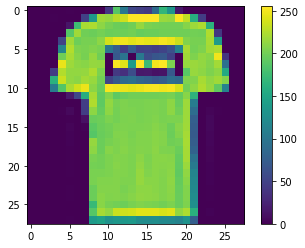

In [4]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Las etiquetas son una matriz de enteros, que van de 0 a 9. Estas corresponden a la clase de vestimenta que representa la imagen:

In [5]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_labels.shape

(10000,)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">PRE - PROCESAMIENTO DE DATOS</p>
<br>

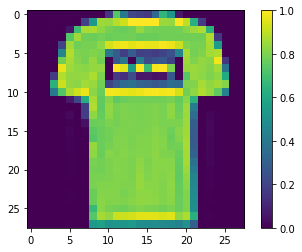

In [12]:
# Para que el rango de valores vaya del 0 al 1

train_images = train_images / 255

test_images = test_images / 255

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

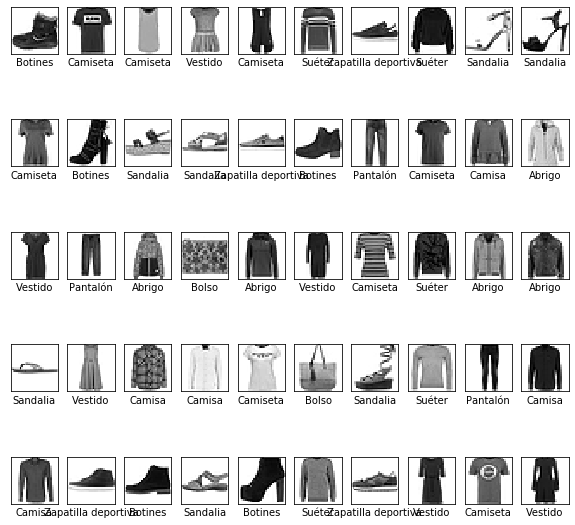

In [13]:
# Imprimimos varias imagenes para dimensionar el dataset

plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> CONFIGURAMOS LA RED NEURONAL</p>
<br><br><br>

<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [14]:
# Sequential es el metodo para crear la red neuronal

# Layer flatten es la capa plana de datos de entrada 
# A la que le pasamos la forma de los datos de entrada 
# 28x28 es el tamaño de cada imagen

# Layer dense es la capa densamente conectada, la del medio y ultima
# se le pasa el numero de neuronas y la funcion de activacion

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
# Resumen de la red neuronal creada

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> Compilación del modelo</p>

Comportamiento del ajuste de los pesos
<br><br><br>

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Comparación de Adam con otros algoritmos de optimización que entrenan a un perceptrón multicapa" >

In [16]:
# Se le indica al modelo la forma de encontrar los pesos
# y disminuir los costes

# Adam es la mejora del gradiente descendiente estocastico
# El learn rate de adam es variable en base a ciertos criterios

# loss es la funcion de coste, la medición del error

# las metricas es como quiero medir los resultados, lo haremos con la presición

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> Entrenamiento del modelo</p>
<br><br><br>

In [17]:
checkpoint_path = "checkpoints/check";
log_dir= os.path.join("logs",'fit', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(train_images,
          train_labels, 
          epochs=15,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callbacks, tensorboard_callback])

# luego ejecuar en terminal 
# tensorboard --logdir logs/fit

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
59008/60000 [============================>.] - ETA: 0s - loss: 0.6170 - accuracy: 0.7936
Epoch 00001: saving model to checkpoints/check
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6154 - accuracy: 0.7940 - val_loss: 0.4854 - val_accuracy: 0.8336
Epoch 2/15
59968/60000 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.8463
Epoch 00002: saving model to checkpoints/check
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4445 - accuracy: 0.8463 - val_loss: 0.4539 - val_accuracy: 0.8425
Epoch 3/15
59008/60000 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.8546
Epoch 00003: saving model to checkpoints/check
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4153 - accuracy: 0.8547 - val_loss: 0.4424 - val_accuracy: 0.8473
Epoch 4/15
59744/60000 [============================>.] - ETA: 0s - loss: 0.4017 - accuracy: 0.

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Precisión -> ", test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.4181 - accuracy: 0.8559
Precisión ->  0.8559


<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> Predicciones</p>
<br><br><br>

In [20]:
predictions = model.predict(test_images)

In [21]:
# Array con la confianza en que la predicción fue hecha
# Un valor para cada categoria

predictions[0]

array([4.5772540e-05, 4.7231797e-08, 6.7189074e-05, 8.6015159e-09,
       3.5461537e-05, 4.2831108e-02, 1.2258050e-04, 1.0357399e-01,
       6.0970401e-03, 8.4722680e-01], dtype=float32)

In [22]:
# Para averiguar cual es la categoria con mejor confianza

np.argmax(predictions[0])

9

<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> Predicciones con imagenes de internet</p>
<br><br><br>

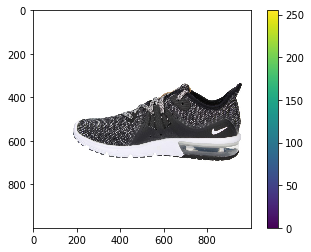

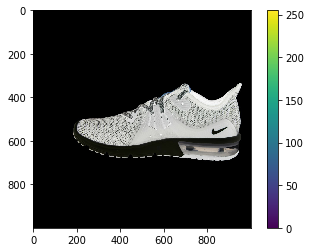

In [23]:
# cargamos una imagen a partir de una url

response = requests.get("https://patuelligroup.vteximg.com.br/arquivos/ids/192327-1000-1000/908993-011_2d_0004_large.jpg?v=636596585937000000")
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

#invertimos la imagen
np_img = 255 - np_img

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
np_img.shape

(1000, 1000, 3)

In [25]:
# La imagen importada tiene 3 dimensiones,
# porque es a color.
# declaramos una función para convertir la imagen de color a escala de grises

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [26]:
bw_image = rgb2gray(np_img)

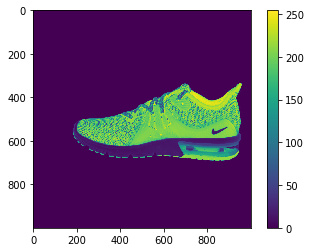

In [27]:
plt.figure()
plt.imshow(bw_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
bw_image.shape

(1000, 1000)

In [29]:
# Achicamos la imagen para que quede igual,
# al de los del dataset de entrenamiento (28 x 28)

# Primer parametro es la imagen
# segundo es el tamaño que queremos llegar
# interpolación 

res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

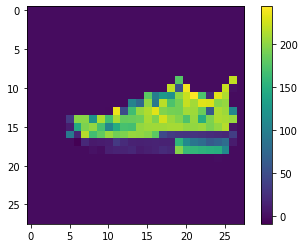

In [30]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

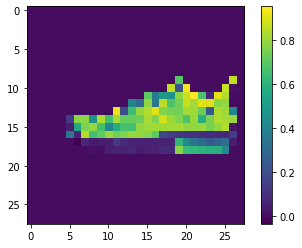

In [31]:
# Cambiamos de 0 a 250 los valores
# Para que quede como el dataset de entrenamiento

res = res / 255 

plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
# Creamos un array de la imagen 

x = np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [33]:
x[0] = np.array(res)

<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> Resultados</p>
<br>

In [34]:
predictions = model.predict(x)
predictions

array([[2.0461481e-04, 1.6172492e-06, 4.4810670e-04, 1.5836093e-08,
        9.3116731e-05, 2.9325113e-01, 1.1138211e-05, 7.0386547e-01,
        9.6589385e-04, 1.1589228e-03]], dtype=float32)

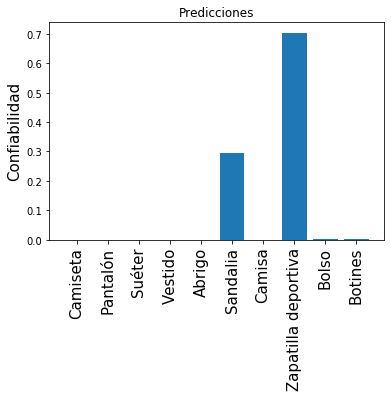

In [35]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

<br> <br><br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> Probamos pesos guardados en un nuevo modelo</p>

<br><br><br>

In [36]:
# Modelo sin los pesos 

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
loss, acc = model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 2.3644 - accuracy: 0.0822


In [38]:
acc

0.0822

<br>
<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> Le cargamos los pesos guardados</p>
<br><br>

In [39]:
model2.load_weights(checkpoint_path)
loss, acc = model2.evaluate(test_images, test_labels)
acc

10000/10000 [==============================] - 0s 27us/sample - loss: 0.4181 - accuracy: 0.8559


0.8559